In [1]:
# Enable interactive rotation of graph
%matplotlib notebook

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = np.loadtxt('sdata.csv',delimiter=',')

<IPython.core.display.Javascript object>


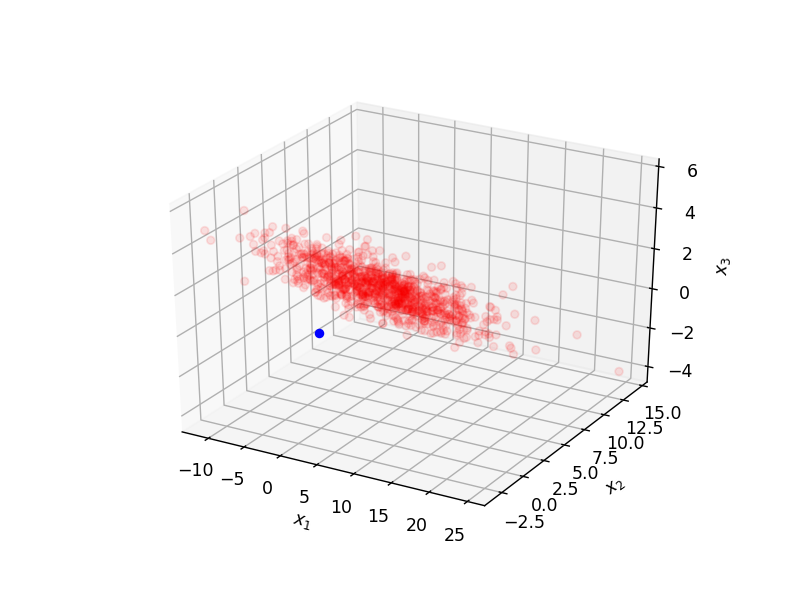

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [3]:
# Subtract mean
X_m = X - np.mean(X, 0)

<IPython.core.display.Javascript object>


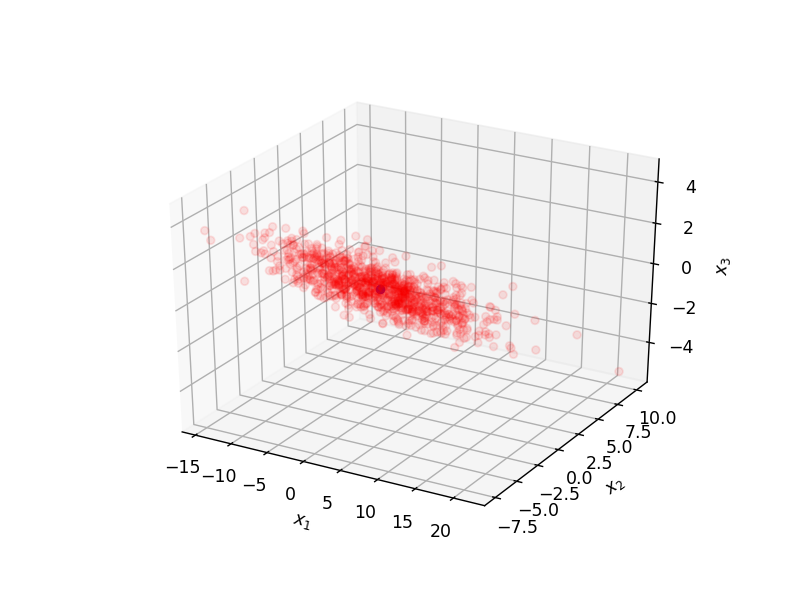

In [4]:
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [5]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a = np.transpose(VT)[:,[0]]

<IPython.core.display.Javascript object>


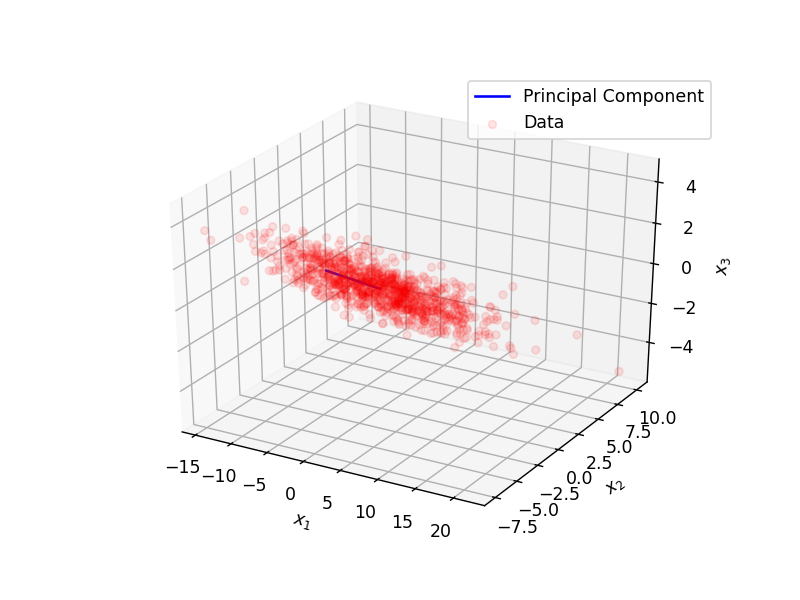

C:\Users\Ayan Deep Hazra\miniconda3\Lib\site-packages\numpy\lib\stride_tricks.py:341: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(array, copy=False, subok=subok)
C:\Users\Ayan Deep Hazra\miniconda3\Lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\Ayan Deep Hazra\miniconda3\Lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of 

In [6]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

# 3

# a

In [7]:
import numpy as np

import scipy.io as sio

data = sio.loadmat('face_emotion_data.mat')

X, y = data['X'], data['y']

err_sum = 0

for i in range(8):

    for j in range(8):

        if i == j: continue

        test_idx_1 = np.arange(i*16, (i+1)*16)

        test_idx_2 = np.arange(j*16, (j+1)*16)

        train_idx = np.setdiff1d(np.arange(128), test_idx_1)

        train_idx = np.setdiff1d(train_idx, test_idx_2)

        X_train, y_train = X[train_idx, :], y[train_idx, :]

        X_test_1, y_test_1 = X[test_idx_1, :], y[test_idx_1, :]

        X_test_2, y_test_2 = X[test_idx_2, :], y[test_idx_2, :]

        min_err, min_r, min_w = np.inf, -1, None

        for r in range(1,10):

            U, s, VT = np.linalg.svd(X_train)

            w = VT[:r, :].T@np.diag(1/s[:r])@U[:,:r].T@y_train

            err_ = np.mean(np.sign(X_test_1@w) != y_test_1)

            if err_< min_err:
    
                min_err, min_r, min_w = err_, r, w

        err_sum += np.mean(np.sign(X_test_2@min_w) != y_test_2)

print(err_sum/8/7)


0.11160714285714286


# b

In [8]:
import numpy as np

import scipy.io as sio

data = sio.loadmat('face_emotion_data.mat')

X, y = data['X'], data['y']

err_sum = 0

for i in range(8):

    for j in range(8):

        if i == j: continue

        test_idx_1 = np.arange(i*16, (i+1)*16)

        test_idx_2 = np.arange(j*16, (j+1)*16)

        train_idx = np.setdiff1d(np.arange(128), test_idx_1)

        train_idx = np.setdiff1d(train_idx, test_idx_2)

        X_train, y_train = X[train_idx, :], y[train_idx, :]

        X_test_1, y_test_1 = X[test_idx_1, :], y[test_idx_1, :]

        X_test_2, y_test_2 = X[test_idx_2, :], y[test_idx_2, :]

        min_err, min_r, min_w = np.inf, -1, None

        for la in [0]+[2.**i for i in range(-1,5)]:

            U, s, VT = np.linalg.svd(X_train, full_matrices=False)
    
            w = VT.T@np.diag(s/(s**2+la))@U.T@y_train

            err_ = np.mean(np.sign(X_test_1@w) != y_test_1)

            if err_< min_err:
    
                min_err, min_r, min_w = err_, r, w

        err_sum += np.mean(np.sign(X_test_2@min_w) != y_test_2)

print(err_sum/8/7)


0.04799107142857143
